In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 

In [2]:
data = pd.read_csv("Company_Data.csv")
data 

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
Data = pd.get_dummies(data)
Data 

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [4]:
df= Data.drop(columns=["ShelveLoc_Bad","ShelveLoc_Medium",'Urban_No','US_No'])

In [5]:
Company = df.rename(columns={'ShelveLoc_Good':'ShelveLoc','Urban_Yes':'Urban','US_Yes':'US'})
Company

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc,Urban,US
0,9.50,138,73,11,276,120,42,17,0,1,1
1,11.22,111,48,16,260,83,65,10,1,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1
4,4.15,141,64,3,340,128,38,13,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,1,1
396,6.14,139,23,3,37,120,55,11,0,0,1
397,7.41,162,26,12,368,159,40,18,0,1,1
398,5.94,100,79,7,284,95,50,12,0,1,1


In [6]:
Company.loc[Company['Sales'] <= 8.5, 'Category'] = 'low'  
Company.loc[Company['Sales'] >= 8.5, 'Category'] = 'high'  
Company

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc,Urban,US,Category
0,9.50,138,73,11,276,120,42,17,0,1,1,high
1,11.22,111,48,16,260,83,65,10,1,1,1,high
2,10.06,113,35,10,269,80,59,12,0,1,1,high
3,7.40,117,100,4,466,97,55,14,0,1,1,low
4,4.15,141,64,3,340,128,38,13,0,1,0,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,1,1,high
396,6.14,139,23,3,37,120,55,11,0,0,1,low
397,7.41,162,26,12,368,159,40,18,0,1,1,low
398,5.94,100,79,7,284,95,50,12,0,1,1,low


In [7]:
df1=Company.drop(columns=['Sales'])
df1 
company_data = df1.rename(columns={'Category':'Sales'})
company_data

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc,Urban,US,Sales
0,138,73,11,276,120,42,17,0,1,1,high
1,111,48,16,260,83,65,10,1,1,1,high
2,113,35,10,269,80,59,12,0,1,1,high
3,117,100,4,466,97,55,14,0,1,1,low
4,141,64,3,340,128,38,13,0,1,0,low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1,1,1,high
396,139,23,3,37,120,55,11,0,0,1,low
397,162,26,12,368,159,40,18,0,1,1,low
398,100,79,7,284,95,50,12,0,1,1,low


In [8]:
company_data.Sales.value_counts()

low     257
high    143
Name: Sales, dtype: int64

In [9]:
label_encoder = preprocessing.LabelEncoder()
company_data['Sales']= label_encoder.fit_transform(company_data['Sales']) 

In [10]:
x =  company_data.iloc[:,0:10]
x

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc,Urban,US
0,138,73,11,276,120,42,17,0,1,1
1,111,48,16,260,83,65,10,1,1,1
2,113,35,10,269,80,59,12,0,1,1
3,117,100,4,466,97,55,14,0,1,1
4,141,64,3,340,128,38,13,0,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1,1,1
396,139,23,3,37,120,55,11,0,0,1
397,162,26,12,368,159,40,18,0,1,1
398,100,79,7,284,95,50,12,0,1,1


In [11]:
y =company_data.iloc[:,10]
y

0      0
1      0
2      0
3      1
4      1
      ..
395    0
396    1
397    1
398    1
399    0
Name: Sales, Length: 400, dtype: int32

In [12]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=50) 

# Building Decision Tree Classifier using Entropy Criteria

In [13]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

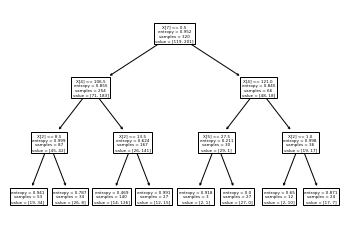

In [14]:
#PLot the decision tree
tree.plot_tree(model);


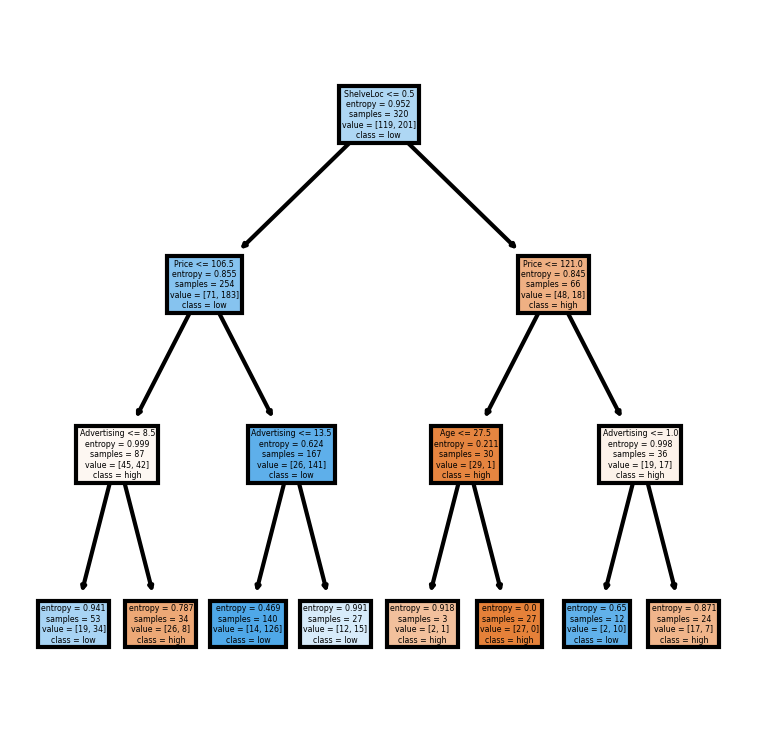

In [15]:
fn=['CompPrice','Income','Advertising','Population','Price','Age','Education','ShelveLoc','Urban','US']
cn=['high', 'low']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [16]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  

1    52
0    28
dtype: int64

In [17]:
pd.crosstab(y_test,preds)  # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Sales,,
0,16,8
1,12,44


In [18]:
np.mean(preds==y_test)

0.75

# # Building Decision Tree Classifier (CART) using Gini Criteria

In [19]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3) 

In [20]:
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3)

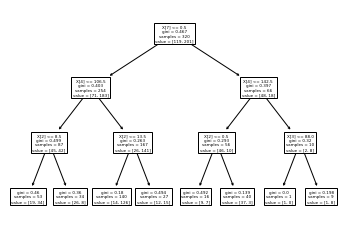

In [21]:
tree.plot_tree(model_gini);


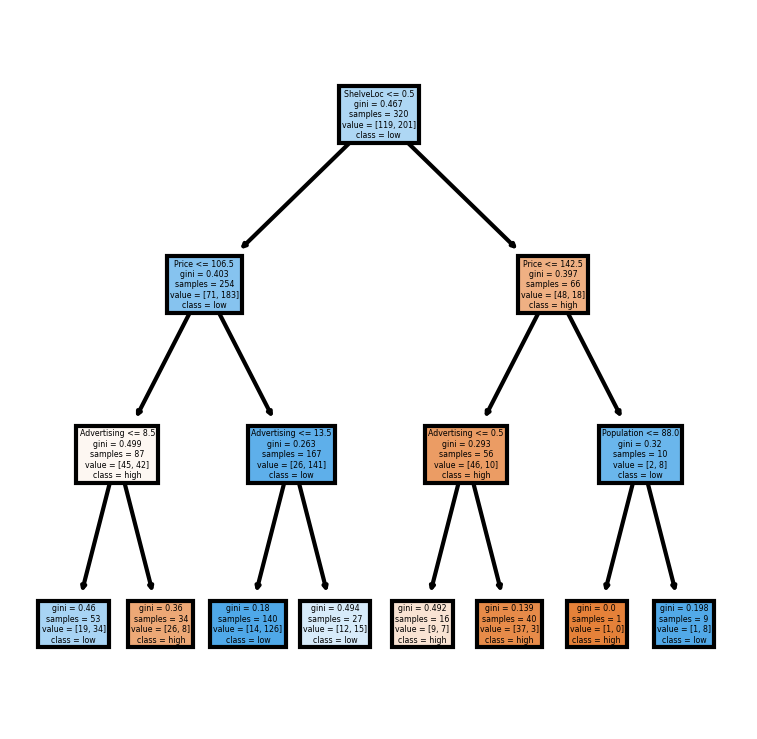

In [22]:
fn2=['CompPrice','Income','Advertising','Population','Price','Age','Education','ShelveLoc','Urban','US']
cn2=['high', 'low']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn2, 
               class_names=cn2,
               filled = True); 

In [23]:
#Prediction and computing the accuracy
pred=model_gini.predict(x_test)
np.mean(preds==y_test) 

0.75